### Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
- Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading excel file using pandas read_excel method

df=pd.read_excel("https://github.com/medashabari/Placement_Assignment_Meda_shabarish/raw/Main/dataset/movie_shows.xlsx")

In [3]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link,self_href,show_href
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371


### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [4]:
season_grouped=df.groupby('season')

In [5]:
season_grouped['average_rating'].mean()

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64

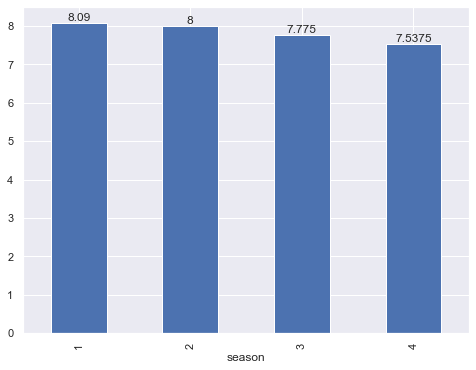

In [6]:
sns.set(rc={"figure.figsize":(8,6)})
ax=season_grouped['average_rating'].mean().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

Observation
 - We can observe the rating from season to season is reducing.

### Get all the episode names, whose average rating is more than 8 for every season

In [7]:
season_avg_ratings = df.groupby('season')['average_rating'].mean()

In [8]:
filtered_episodes = df.groupby('season').apply(lambda x: x[x['average_rating']>8]['name'])


In [9]:
filtered_episodes = pd.Series([episode for episode in filtered_episodes])

In [10]:
filtered_episodes

0                Trompe L'Oeil
1    The Well-Tempered Clavier
2           The Bicameral Mind
3                      Kiksuya
4              Vanishing Point
5                The Passenger
dtype: object

### Get all the episode names that aired before May 2019

In [11]:
df['airdate'] = pd.to_datetime(df['airdate'])
df['year'] = df['airdate'].dt.year

In [12]:
df[df['year']<2019]['name']

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

### Get the episode name from each season with the highest and lowest rating

In [13]:
df.groupby("season",)['average_rating'].agg({"max","min"})

,max,min
season,,
1,8.7,7.6
2,8.7,7.6
3,8.0,7.5
4,7.8,7.1


In [14]:
max_index=df.groupby('season')['average_rating'].idxmax()
max_rating_episodes=df.loc[max_index,'name']
min_index=df.groupby('season')['average_rating'].idxmin()
min_rating_episodes=df.loc[min_index,'name']

In [15]:
res = pd.DataFrame({'season':[1,2,3,4],
                   "Highest_rating_episodes":max_rating_episodes.values,
                   "Lowest_rating_episodes":min_rating_episodes.values})

In [16]:
res

,season,Highest_rating_episodes,Lowest_rating_episodes
0,1,The Bicameral Mind,The Stray
1,2,Kiksuya,Akane No Mai
2,3,Parce Domine,Decoherence
3,4,Zhuangzi,The Auguries


### Get the summary for the most popular ( ratings ) episode in every season

In [17]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link,self_href,show_href,year
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371,2016
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371,2016
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371,2016
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371,2016
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371,2016


In [20]:
popular_rating = df.groupby('season')['average_rating'].idxmax()
summaries = df.loc[popular_rating,'summary']

In [26]:
pd.DataFrame({"season":[1,2,3,4],"popular_rating_Summaries":summaries})

,season,popular_rating_Summaries
9,1,Delores finds out the truth about William's fa...
17,2,Another of Westworld's Host revolutionaries is...
20,3,"If you're stuck in a loop, try walking in a st..."
32,4,God is bored.
